# TP I : Descentes de Gradient

Ce TP vise √† apporter les √©l√©ments n√©cessaires pour comprendre les implementations des descentes de gradients. **C'est un *TP √† trous* ; il s'agira de compl√©ter ces trous et d'y ajouter les tests qui vous sembleront utiles.**

Voici un aper√ßu des points abord√©s lors de ce TP.

- partie I
    - D√©finition d'un ensemble de fonctions test
- partie II
    - Calcul du gradient d'une fonction de mani√®re approch√©e (pour couvrir des cas o√π le calcul explicite du gradient est impossible ou p√©nible).
- partie III
    - La descente dans la direction du Gradient √† pas constant
    - Optimisation du pas par Backtracking
- partie IV
    - Choix d'une autre direction que le gradient
        - De plus forte pente en norme $l_1$
        - Gradient conjugu√©
- partie V
    - Acc√©l√©ration : Momentum, Nesterov, Adagrda.
- partie VI
    - La M√©thode de Newton et la m√©thode de quasi-Newton

    
Dans l'ensemble du d√©roul√© du TP vous ferez bien attention √† valider par un jeu de tests la validit√© des programmes √©crits. Vous regarderez l'influence des param√®tres sur la convergence. Vous comparerez les int√©r√™ts des dif√©rentes m√©thodes les unes par rapport aux autres.

## Attendus de rendu

Jusqu'il n'y a pas tr√®s longtemps (l'ann√©e derni√®re, pour √™tre pr√©cis), les √©tudiants √©taient √©valu√©s sur leur capacit√© √† impl√©menter des m√©thodes de descentes op√©rationnelles et √† les comparer entre elles.<br>
Il est aujourd'hui tr√®s facile d'impl√©menter n'importe quel algorithme de descente, en n'importe quel langage (merci ChatGPT). Les attendus sont donc amen√©s √† changer : exit la v√©rification que le code que vous avez √©crit est correct (car il n'est plus possible d'en garantir la source (sachant que √ßa n'√©tait d√©j√† pas √©vident par le pass√©...)).

Cependant, la capacit√© √† produire un benchmark de qualit√©, et surtout √† l'analyser de mani√®re rigoureuse et d'en tirer des conclusions pertinentes, reste quand m√™me propre √† l'humain.

**Votre rendu sera donc jug√© sur** :
- l'√©tude effectu√©e concernant la sensibilit√© de vos algorithmes de descente aux hyperparam√®tres / conditions initiales
- l'analyse comparative propos√©e quant aux diff√©rentes impl√©mentations sugg√©r√©es 
- la pr√©cision et concision des r√©sultats pr√©sent√©s (par exemple, dans les choix que vous ferez pour visualiser l'influence de tel ou tel param√®tre sur telle ou telle m√©trique attestant de la convergence de votre algorithme).

Comme vous allez le d√©couvrir, ce TP est tr√®s riche et tr√®s long. Il n'est pas attendu de vous que vous impl√©mentiez n√©c√©ssairement **toutes** les m√©thodes demand√©es, ni que vous benchmarkiez pour une m√©thode donn√©e, l'influence de **tous** les hyperparam√®tres. C'est √† vous de choisir ce que vous voulez comparer, en fonction de ce qui a le plus √©veill√© votre curiosit√© lors des cours en lien avec les m√©thodes de descente.

√Ä titre d'exemple, voici le genre de *benchmarks* que vous pouvez faire en fonction de leur difficult√© (symbolis√©e par le nombre de ‚≠ê):
- Influence du pas sur le nombre d'it√©rations dans le cas de la descente de gradient √† pas constant et ad√©quation avec la th√©orie (‚≠ê)
- Influence d'un hyperparam√®tre du crit√®re d'Armijo dans le cas d'une descente de gradient pour une fonction convexe (‚≠ê)
- Influence du crit√®re d'arr√™t sur le nombre d'it√©rations de la m√©thode de descente (‚≠ê)
- Influence conjointe des deux hyperparam√®tres du crit√®re d'Armijo dans le cas d'une descente de gradient pour une fonction convexe (‚≠ê‚≠ê)
- Influence du choix de la m√©thode (Fletcher-Reeves vs Polack-Ribi√®re) pour l'algorithme du gradient conjugu√© pour une classe de fonction non-convexes (‚≠ê‚≠ê)
- Comparaison de rapidit√© et de pr√©cision pour les m√©thodes de gradient conjugu√©, Newton (dans le cas quadratique) et quasi-Newton dans le cas g√©n√©ral (‚≠ê‚≠ê‚≠ê)

√âvidemment, libre √† vous de conduire n'importe quel autre type de benchmark, du moment que votre choix est justifi√©.

‚ö†Ô∏è Un benchmark bien conduit, c'est bien. Mais un benchmark bien conduit **et** bien analys√©, c'est mieux ! Pour chaque benchmark que vous produirez, chaque courbe que vous tracerez, vous devez donc vous poser la question "Que puis-je en d√©duire ? Est-ce conforme √† ce que pr√©dit la th√©orie (ou √† minima, l'intuition que j'ai du fonctionnement de la m√©thode qui est benchmark√©e) ?

Ce TP est √† rendre par **groupe de 2** ou **par groupe de 3**.<br>
Dans tous les cas, vous devrez rendre un rapport au format pdf regroupant tous les benchmarks et analyses que vous voudrez pr√©senter :
- 10 $\pm$ 1 pages si vous travaillez √† 2
- 15 $\pm$ 1 pages si vous travaillez √† 3

Des p√©nalit√©s s'appliqueront sur la notation pour tout rapport trop court ou trop long. **Dans tous les cas, vous indiquerez la r√©partition du travail au sein du groupe** (qui a r√©alis√© quel benchmark, etc)

# Au travail!

In [2]:
import warnings
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## I- Un set de fonctions tests

Cette partie ne n√©cessite pas de travail de votre part

Nous allons ici introduire quelques fonctions test qui permettent de repr√©senter les situations suivantes:
- Fonctions globalement convexes ou uniquement localement convexes
- Fonctions admettant ou non un minimum global
- Fonctions admettant ou non des minimums locaux

Nous partons de fonctions d√©finies sur $\mathbb{R}$ mais on verra que cela permet de d√©finir des fonctions "int√©ressantes" sur $\mathbb{R}^n$.

### Fonctions du set de test

#### 1. D√©finir des familles de fonctions *convexes* sur $\mathbb{R}$  ou sur une partie de $\mathbb{R}$ ayant un nombre de conditionnement uniquement d√©pendant des param√®tres de la famille.  

In [3]:
def quadratic1_(x,gamma):
    return gamma*(x**2) + x + 1 #valeur de la fonction

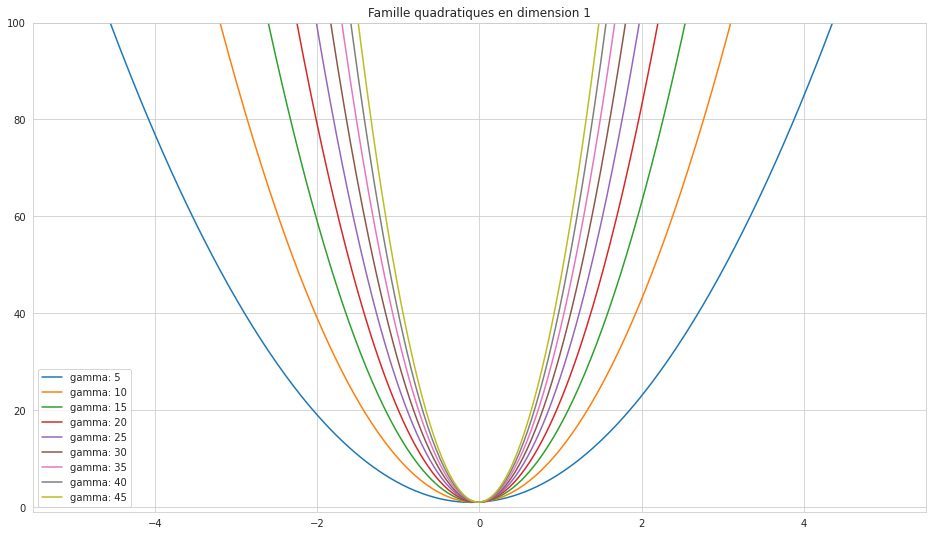

In [4]:
fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(-5, 5, 400)
ax.set_ylim(-1, 100)
for gamma in range(5, 50, 5):
    ax.plot(x, quadratic1_(x, gamma), label="gamma: {}".format(gamma))
ax.set_title("Famille quadratiques en dimension 1")
ax.legend()
plt.show()

In [5]:
def cubic1_(x,gamma):
    return x**3 + gamma*x**2 + x + 1 #valeur de la fonction

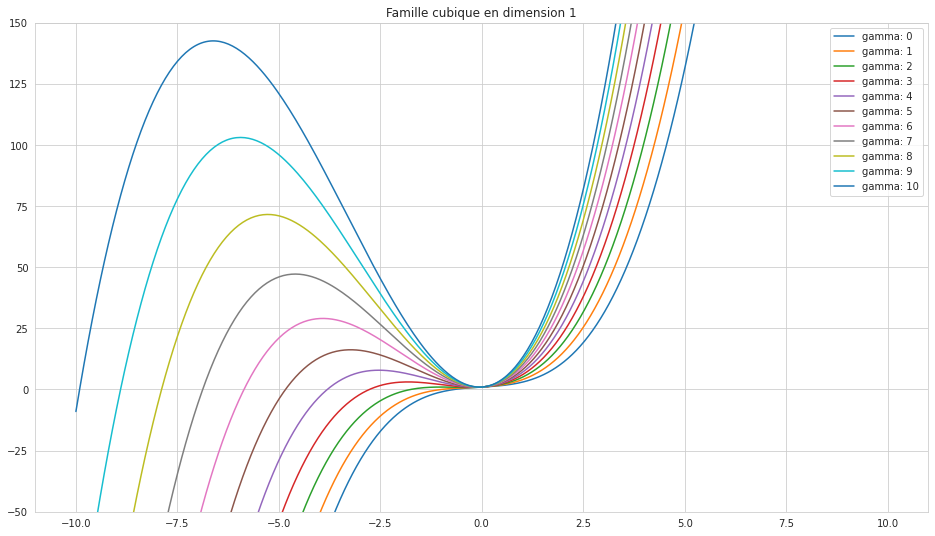

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(-10, 10, 400)
ax.set_ylim(-50, 150)
for gamma in range(0, 11, 1):
    ax.plot(x, cubic1_(x, gamma), label="gamma: {}".format(gamma))
ax.set_title("Famille cubique en dimension 1")
ax.legend()
plt.show()

In [7]:
def multitrous1_(x,gamma):
        return 20*np.cos(x**2) + (gamma * x**2) #valeur de la fonction

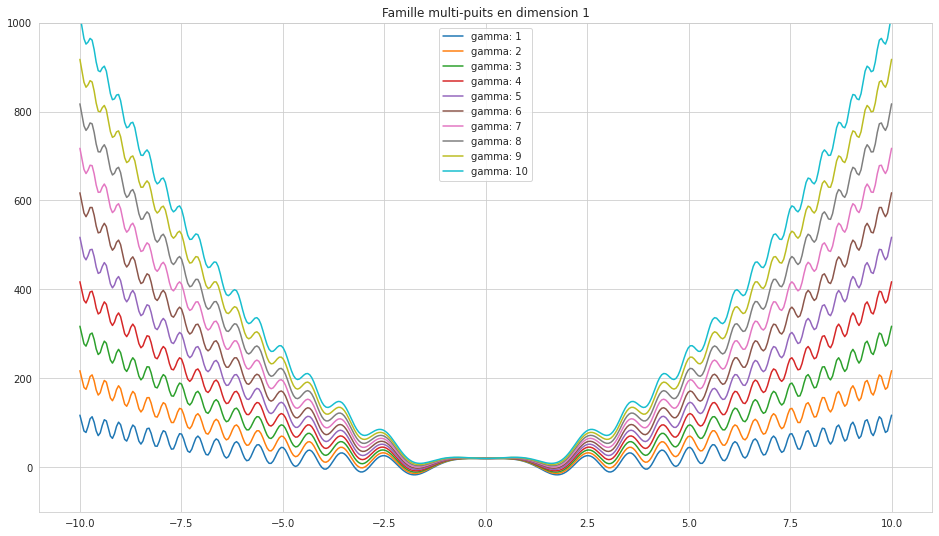

In [8]:
fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(-10, 10, 400)
ax.set_ylim(-100, 1000)
for gamma in range(1, 11, 1):
    ax.plot(x, multitrous1_(x, gamma), label="gamma: {}".format(gamma))
ax.set_title("Famille multi-puits en dimension 1")
ax.legend()
plt.show()

#### 2. Faire de m√™me avec des fonctions sur $\mathbb{R}^2$.

In [9]:
def quadratic2_(x,gamma):
        return quadratic1_(x[0],gamma[0])+quadratic1_(x[1],gamma[1]) #valeur de la fonction

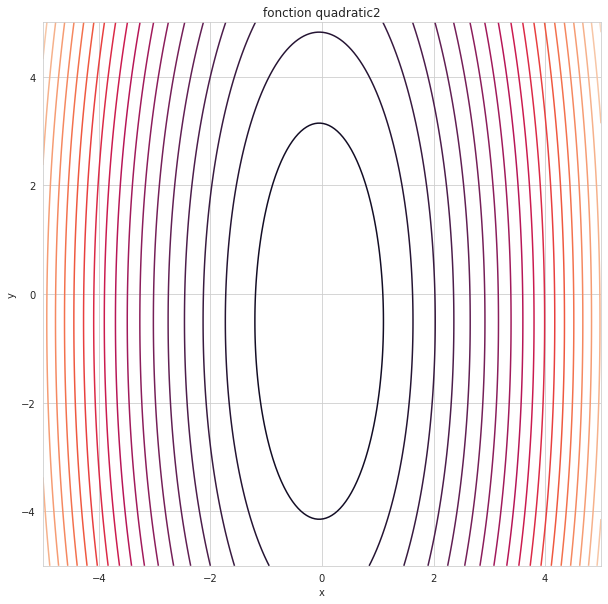

In [10]:
nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -5, 5, -5, 5
x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(y_mi, y_ma, nb_pts)
X, Y = np.meshgrid(x, y)

gamma=np.zeros(2)
gamma[0]=10
gamma[1]=1

Z=np.zeros((nb_pts,nb_pts))

for i in range (nb_pts):
    for j in range (nb_pts):
        Z[i,j]=quadratic2_(np.array([X[i,j],Y[i,j]]),gamma)

fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 

ax.contour(X, Y, Z,20) 
  
ax.set_title('fonction quadratic2') 
ax.set_xlabel('x') 
ax.set_ylabel('y') 

plt.show()

In [11]:
def cubic2_(x,gamma=10):
        return cubic1_(x[0],gamma)+cubic1_(x[1],gamma) #valeur de la fonction

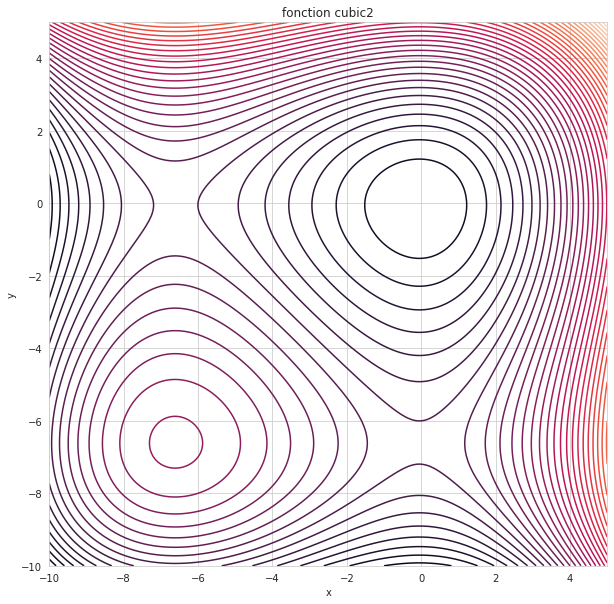

In [12]:
nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -10, 5, -10, 5
x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(y_mi, y_ma, nb_pts)
X, Y = np.meshgrid(x, y)


Z=np.zeros((nb_pts,nb_pts))

for i in range (nb_pts):
    for j in range (nb_pts):
        Z[i,j]=cubic2_(np.array([X[i,j],Y[i,j]]))


fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 

ax.contour(X, Y, Z,50) 
  
ax.set_title('fonction cubic2') 
ax.set_xlabel('x') 
ax.set_ylabel('y') 

plt.show()

In [13]:
def multitrous2_(x,gamma=4):
        return multitrous1_(x[0],1)+multitrous1_(x[1],gamma) #valeur de la fonction

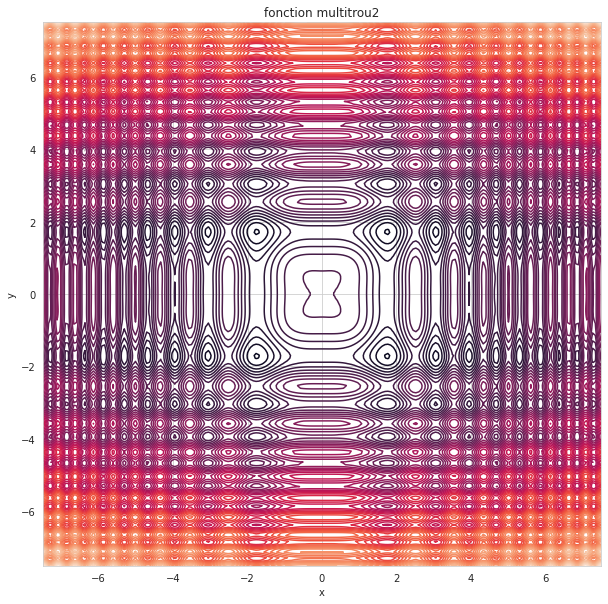

In [14]:
nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -7.5, 7.5, -7.5, 7.5
x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(y_mi, y_ma, nb_pts)
X, Y = np.meshgrid(x, y)


Z=np.zeros((nb_pts,nb_pts))

for i in range (nb_pts):
    for j in range (nb_pts):
        Z[i,j]=multitrous2_(np.array([X[i,j],Y[i,j]]))


fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 

ax.contour(X, Y, Z,50) 
  
ax.set_title('fonction multitrou2') 
ax.set_xlabel('x') 
ax.set_ylabel('y') 

plt.show()

#### 3. On construit ici une fonction convexe en dimension n

On va prendre comme fonction test la fonction convexe "g√©n√©rique" dans $\mathbb{R}^n$, $ x \mapsto \frac{1}{2}x^T A x-b^Tx$, 

o√π A est une matrice sym√©trique d√©finie positive de taille $(n,n)$ et $b$ un vecteur de $\mathbb{R}^n$.

On a vu en cours que cette fonction est convexe, qu'elle admet donc un minimum global sur $\mathbb{R}^n$, et que ce minimum est atteint au point o√π son gradient s'annule, c'est √† dire au point o√π $Ax=b$.


Une mani√®re commode de construire une matrice $A$ sym√©trique d√©finie positive est de la voir comme une matrice de la forme $A=U^T U$ avec $U$ triangulaire sup√©rieure car cela nous permet  √† la fois de s'assurer qu'elle est sym√©trique, inversible, positive et en plus de "contr√¥ler" les valeurs propres de $A$ et donc son conditionnement.
Le conditionnement de $A$ est le rapport entre la plus grande et la plus petite de ses valeurs propres. C'est le carr√© du rapport entre la plus grande et la plus petite des valeurs propres de $U$ qu'on trouve sur la diagonale.


In [15]:
def create_system (dim,cond=10,seed=100):
    np.random.seed(seed)
    A=0.1*np.random.uniform(-math.sqrt(cond),math.sqrt(cond),size=(dim,dim))
    A=np.triu(A)
    # on remplace la diagonale de A par des valeurs al√©atoires positives entre 1 et sqrt(cond)
    A=A-np.diag(np.diag(A))+np.diag(np.random.uniform(1.,math.sqrt(cond),size=(dim))) 
    # on impose les deux premiers termes de la diagonale diagonale de A pour fixer le conditionnement
    A[0,0]=1.
    A[1,1]=math.sqrt(cond)
    b=1.*np.random.randint(-10,10,size=(dim))
    A=A.T @ A
    return A,b

In [16]:
A,b = create_system(5,cond=10)
print (A,b)

[[ 1.         -0.14017151 -0.04773927  0.21805557 -0.3132433 ]
 [-0.14017151 10.01964805  0.6583972  -0.757152    0.19409444]
 [-0.04773927  0.6583972   2.43429773 -0.44063605 -0.24929874]
 [ 0.21805557 -0.757152   -0.44063605  7.56250011 -0.42402717]
 [-0.3132433   0.19409444 -0.24929874 -0.42402717  1.21928084]] [ 4.  7.  6.  5. -3.]


In [17]:
def quadraticn_(x):
    return (x.T@A@x)/2-b.T@x #valeur de la fonction

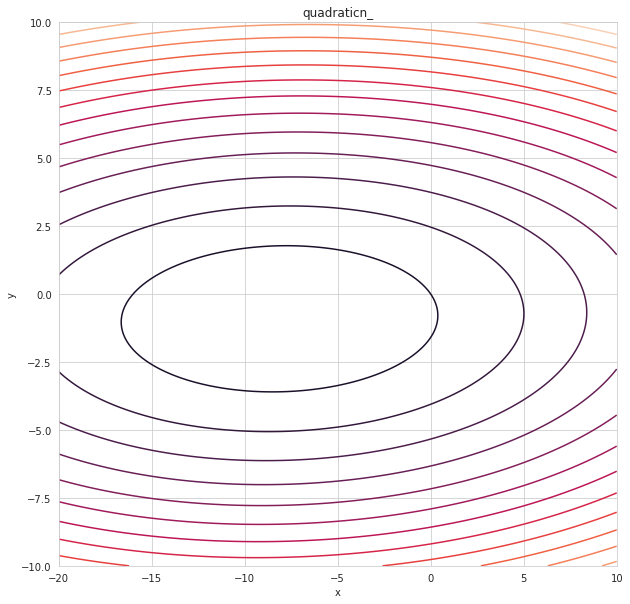

In [18]:
nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -20, 10, -10, 10

x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(y_mi, y_ma, nb_pts)
X, Y = np.meshgrid(x, y)

dim=2
A,b = create_system(dim,cond=10)

Z=np.zeros((nb_pts,nb_pts))

for i in range (nb_pts):
    for j in range (nb_pts):
        Z[i,j]=quadraticn_(np.array([X[i,j],Y[i,j]]))

fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 

ax.contour(X, Y, Z,15) 
  
ax.set_title('quadraticn_') 
ax.set_xlabel('x') 
ax.set_ylabel('y') 

plt.show()

#### 4. La banane de Rosenbrock

Voici une fonction c√©l√®bre pour tester les algorithmes d'optimisation.

$$f(x,y)=(x-1)^2+\gamma (x^2-y)^2.$$

Ce n'est pas √©vident √† visualiser mais cette fonction pr√©sente un minimum global unique qui se situe au fond d'une vall√©e tr√®s √©troite et en forme de parabole.


In [83]:
def Rosenbrock(x,gamma=100):
        return (x[0]-1)**2+gamma*(x[0]**2-x[1])**2 #valeur de la fonction

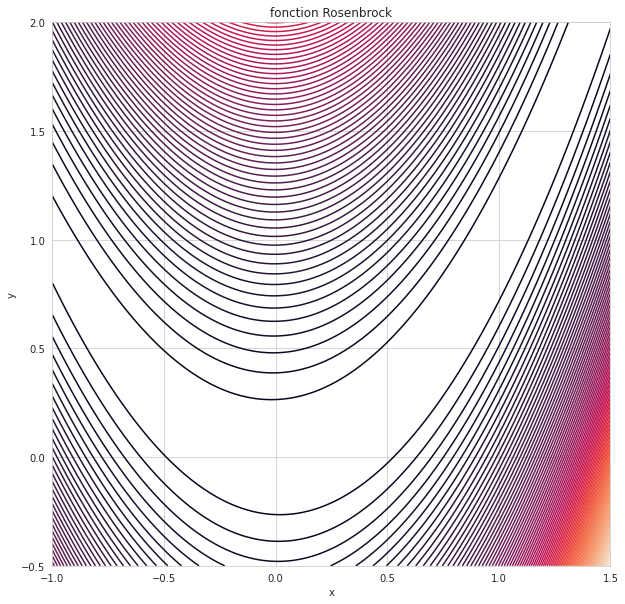

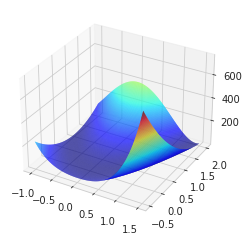

In [84]:
nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -1, 1.5, -0.5, 2
x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(y_mi, y_ma, nb_pts)
X, Y = np.meshgrid(x, y)

Z=np.zeros((nb_pts,nb_pts))

for i in range (nb_pts):
    for j in range (nb_pts):
        Z[i,j]=Rosenbrock(np.array([X[i,j],Y[i,j]]))

fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 
ax.contour(X, Y, Z,100) 
ax.set_title('fonction Rosenbrock') 
ax.set_xlabel('x') 
ax.set_ylabel('y') 
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='jet', edgecolor='none')
plt.show()

### Conclusion

On voit sur ces quelques exemples que des fonctions d'apparence "inoffensives" peuvent avoir des comportements complexes en ce qui concerne leurs extrema locaux ou globaux.

${\bf Nous \, vous \, invitons \, √† \, tester}$ les programmes que vous √©crirez:
* sur la fonction quadratique pour la dimension n=2 puis n=10, et pour des conditionnements variant de 5 √† 1000.
* sur la fonction de Rosenbrock pour des valeurs de gamma variant de 5 √† 100

## II- Diff√©rencier une fonction num√©riquement

On verra aussi comment calculer le gradient de mani√®re approch√©e. Cela est particuli√®rement utile quand la seule information disponible sur la fonction √† minimiser est sa valeur en tout point.

Pour calculer le gradient d'une fonction on a d√©j√† besoin de savoir calculer la d√©riv√©e d'une fonction r√©elle, et on en tire ensuite une version num√©rique du gradient.

### Le calcul num√©rique de la d√©riv√©e

Pour $h$ assez petit on peut approcher $f'(x)$ par 
$$ f'(x) \simeq \frac{f(x + h) - f(x)}{h} .$$
L'erreur de l'approximation est en $o(1)$ quand $h \to 0$. 

$$ $$
On peut en r√©alit√© faire un peu mieux en approchant $f'(x)$ par 
$$f'(x) \simeq \frac{f(x+h)-f(x-h)}{2h}.$$
On trouve que l'erreur d'approximation dans le second cas est d√©sormais en $o(h)$ quand $h \to 0$; ce qui est a priori meilleur.

#### 1. Utiliser la d√©marche pr√©c√©dente pour approcher la d√©riv√©e partielle d'une fonction en un point. Cette fonction sera not√©e `partial`.

In [21]:
def partial(f, x, i=0, dx=1e-8):
    """Computes i-th partial derivative of f at point x.
    
    Args:
        f: objective function.
        x: point at which partial derivative is computed.
        i: coordinate along which derivative is computed.
        dx: slack for finite difference.
        
    Output:
        (float)

    """
    h = np.zeros(x.size)
    h[i] = dx
    return (f(x + h) - f(x - h)) / (2*dx)

#### 2. Comparer `partial` √† l'expression exacte de la d√©riv√©e partielle d'une fonction de votre choix. 

In [22]:
partial(lambda x: np.exp(x), np.array([100]))

array([2.68811544e+43])

In [23]:
np.exp(np.array([100]))

array([2.68811714e+43])

### Le calcul du gradient

Comme dit pr√©c√©demment, comme le calcul exact du gradient n'est parfois pas possible ou facile, on se garde la possibilit√© de calculer num√©riquement le gradient d'une fonction.

#### 1. √âcrire une fonction `gradient` qui renvoie le gradient d'une fonction en un point gr√¢ce √† la fonction pr√©c√©dente

In [25]:
def gradient(f, x, dx=1e-8):
    """Computes gradient of f at point x.
    
    Args:
        f: objective function.
        x: point at which gradient is computed.
        dx: slack for finite difference of partial derivatives.
        
    Output:
        (ndarray) of size domain of f.
        
    """
    return np.array([partial(f, x, i, dx) for i in range(x.size)])


#### 2. Tester cette fonction gradient sur une fonction connue.

In [26]:
x=np.zeros(2)
x[0]=1
x[1]=10
gradient(lambda x: x[0]**5 + x[1]**2, x)

array([ 4.9999997 , 20.00000165])

## III- Descente du gradient

Tout d'abord, nous allons impl√©menter des descentes qui se feront dans la direction du Gradient


### le cas g√©n√©rique de descente de gradient avec un pas constant


* prendre un point de d√©part au hasard ${\bf x_0}$.

Quand on est au point ${\bf x_k}$

* calculer le gradient de $f$ en ce point $\nabla f({\bf x_k})$

* On choisit une direction de descente ${\bf d}_k = - \nabla f({\bf x}_k)$

* avancer dans cette direction : ${\bf x}_{k+1} = {\bf x}_k + \eta \, {\bf d}_k$

et on recommence cette derni√®re √©tape jusqu'√† ce qu'on arrive √† un point fixe c.a.d. que 
$|| {\bf x}_{k+1} - {\bf x}_k|| < \varepsilon$ avec $\varepsilon$ une toute petite valeur.

Impl√©menter cette m√©thode, la tester sur des fonctions tests d√©finies plus haute, observer en particulier le comportement en fonction de $\mu$ qui est le pas constant.

Attention: bien pr√©voir dans le code des conditions pour √©viter de se retrouver pi√©g√© dans des boucles infinies !!!

#### 1. Impl√©menter cette m√©thode, la tester sur des fonctions tests d√©finies plus haute, observer en particulier le comportement en fonction de $\eta$ qui est le pas constant.

Attention: bien pr√©voir dans le code des conditions pour √©viter de se retrouver pi√©g√© dans des boucles infinies !!!
On conseille de stocker les diff√©rentes valeurs calcul√©es pour les points ${\bf x_k}$ afin de pouvoir "regarder" la mani√®re dont la convergence se passe.

In [31]:
def desc_grad_const (f,x0,eta=0.001,eps=1E-6, max_iter = 10000):
    """
    Description: 
    Parameters:
    x0: point initial
    f: fonction √† minimiser
    eta: valeur constante du pas (0.001 par d√©faut)
    eps: crit√®re √† partir duquel on consid√®rera que la suite est "constante"
    
    Output
    Tableau contenant l'ensemble des positions successives p_k
    """
    xk = [x0]
    while len(xk) <= max_iter:
        gradient_xk = gradient(f, xk[-1])
        new_xk = xk[-1] - eta * gradient_xk
        xk.append(new_xk)
        if np.linalg.norm(new_xk - xk[-2]) < eps:
            break
    return xk


#### 2. Tester cette descente sur un cas simple (prendre par exemple en dimension n=10, la fonction quadraticn_ dans un cas o√π vous connaissez la solution).

In [96]:
dim=10
cond=100.
A,b = create_system(dim,cond)
x_exact=np.zeros(dim)+1.
b=A@x_exact

x0=np.zeros(dim)
res = desc_grad_const(quadraticn_,x0,eta=0.01)

print ("Nb it√©rations",len(res))
print("x_calcul√©",res[-1])
print ("x_exact",x_exact)
print("=========================================")
print(res)

Nb it√©rations 975
x_calcul√© [0.99989089 1.00000016 1.00000036 1.00000458 0.99999788 0.9999988
 1.00000074 1.00000063 0.9999989  1.00000392]
x_exact [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([-0.00235294,  0.91423278,  0.16362689,  0.09157832,  0.44539776,
        0.70635193,  0.43276649,  0.67614605,  0.91847571,  0.03765246]), array([0.00947626, 0.84376918, 0.36671667, 0.23166144, 0.73679648,
       0.88772345, 0.65562526, 0.89971274, 0.98366587, 0.09482823]), array([0.02264446, 0.86514003, 0.51901642, 0.34959889, 0.87348026,
       0.96249435, 0.79229526, 0.93530014, 1.02395686, 0.14299919]), array([0.03663398, 0.87754721, 0.62843464, 0.45142913, 0.94075311,
       0.98792902, 0.87094801, 0.95890814, 1.02941542, 0.19092775]), array([0.05040574, 0.89230883, 0.70565267, 0.53908713, 0.97478663,
       0.99779395, 0.9164107 , 0.97085485, 1.02951167, 0.23882757]), array([0.06372472, 0.90530667, 0.76028569, 0.6145696 , 0.9929827 ,
       1.00

Nous allons maintenant montrer l'influence du pas sur le nombre d'it√©rations dans le cas de la descente de gradient √† pas constant et ad√©quation avec la th√©orie

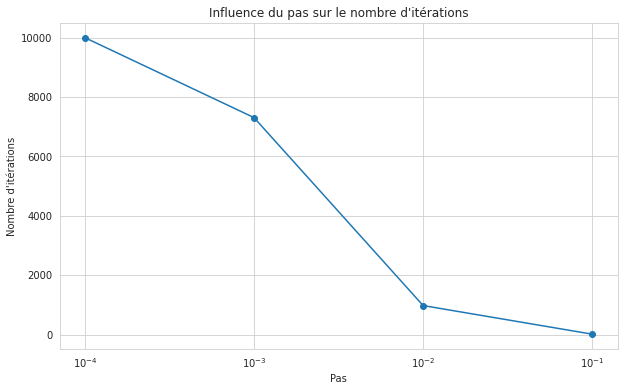

In [98]:
import matplotlib.pyplot as plt

# Fonction quadratique
dim = 10
cond = 100.
A, b = create_system(dim, cond)
x_exact = np.zeros(dim) + 1.
b = A @ x_exact

# Point de d√©part
x0 = np.zeros(dim)

# Liste des valeurs de pas √† tester
etas = [0.0001, 0.001, 0.01, 0.1]

# Nombre d'it√©rations pour chaque pas
num_iters = []

for eta in etas:
    res_const = desc_grad_const(lambda x: 0.5 * x.T @ A @ x - b.T @ x, x0, eta=eta)
    num_iters.append(len(res_const))

# Graphique du nombre d'it√©rations en fonction du pas
plt.figure(figsize=(10, 6))
plt.plot(etas, num_iters, 'o-')
plt.xscale('log')
plt.xlabel('Pas')
plt.ylabel('Nombre d\'it√©rations')
plt.title('Influence du pas sur le nombre d\'it√©rations')
plt.grid(True)
plt.show()


L'impact du pas de la descente de gradient √† pas constant peut √™tre illustr√© en utilisant diff√©rentes valeurs de pas, au dessus (0.0001, 0.001, 0.01 et 0.1). En surveillant le nombre d'it√©rations n√©cessaire pour atteindre la convergence on percois qu'un pas plus important mene a une convergence plus rapide. En g√©n√©ral, un pas trop petit peut entra√Æner une convergence tr√®s lente (n√©cessitant de nombreuses it√©rations), tandis qu'un pas trop grand peut entra√Æner des oscillations autour du minimum ou m√™me une divergence de l'algorithme

/tmp/ipykernel_36206/3197018730.py:13: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([partial(f, x, i, dx) for i in range(x.size)])
/tmp/ipykernel_36206/3243085672.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(x_hist, f(np.array(x_hist)), 'o-', label="descente de gradient")


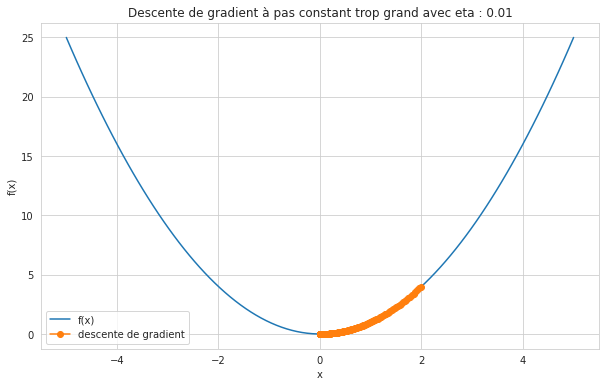

x_calcul√© [[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[4.852279516386025e-05]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]


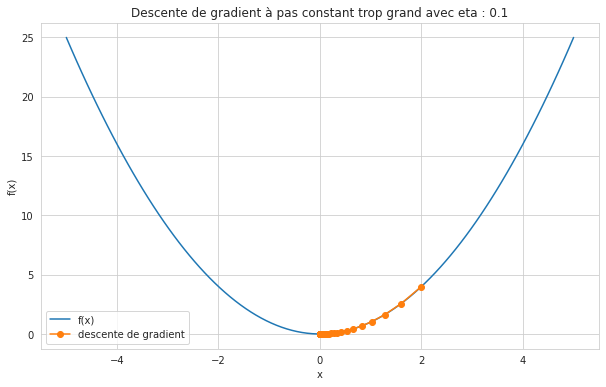

x_calcul√© [[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[3.831238870732885e-06]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]


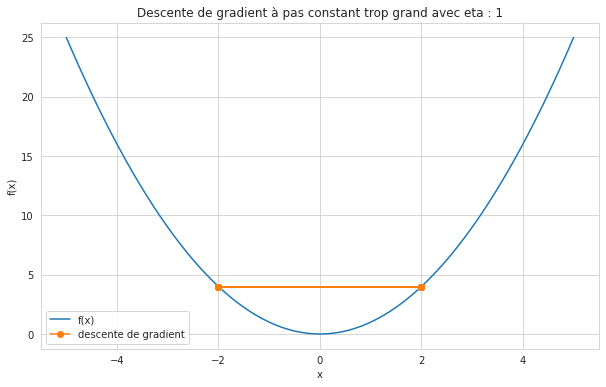

x_calcul√© [[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[1.9999753086399323]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]


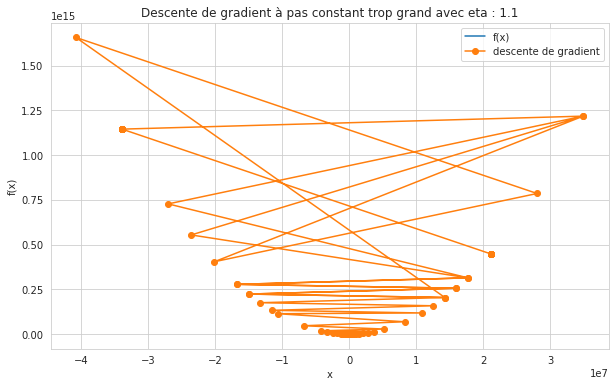

x_calcul√© [[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[21153675.89480392]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]


In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction quadratique
f = lambda x: x**2

def draw_gradient_descent_with_big_step(our_eta):
    x0= np.array([2])
    x_hist = desc_grad_const(f, x0, eta=our_eta, eps= 1E-6, max_iter=1000);
    # Descente de gradient √† pas constant
    #print(x_hist)
    # # Points pour la fonction
    x_points = np.linspace(-5, 5, 100)
    y_points = f(x_points)

    # Graphique
    plt.figure(figsize=(10, 6))
    plt.plot(x_points, y_points, label="f(x)")
    plt.plot(x_hist, f(np.array(x_hist)), 'o-', label="descente de gradient")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f"Descente de gradient √† pas constant trop grand avec eta : {our_eta}")   
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("x_calcul√©",x_hist[-1])



different_eta = [0.01, 0.1, 1, 1.1]

for el in different_eta:
    draw_gradient_descent_with_big_step(el)


On remarque que si le pas est trop important alors on peut avoir une descente de gradient divergent, comme dans le cas o√π eta = 1, et des resultat finaux peux precis. 

Dans le cas ou eta = 1, il reste au starting point, en effet ... theory.

     

### 1√®re am√©lioration: le choix d'un pas "optimal" √† chaque √©tape par *backtracking* (ou rebroussement avec crit√®re d'Armijo)

Vous devriez avoir constat√© que le choix du pas de descente dans le cas constant est crucial pour garantir la convergence de l'algorithme de descente. Dans cette section on s'int√©resse √† un calcul adaptatif du pas de descente qui permet de mieux garantir la convergence de notre algo. Le d√©savantage est le temps que prend d√©sormais chaque it√©ration pour s'ex√©cuter.


Ici on veut imposer la d√©croissance de la suite $f({\bf x}_k)$ ce qui nous assurera la convergence. Mais pour assurer la convergence vers un minimum, il faut imposer un peu plus que simplement de descendre, c'est ce que traduit le crit√®re d'Armijo.

On prend ici deux param√®tres $0<\alpha<0.5$ et $0<\beta<1$.

On cherche un $\eta$ qui v√©rifie:
$$ f({\bf x}_k+\eta {\bf d}_k) < f({\bf x}_k) + \alpha \, \eta \, {\bf d}_k ^T \, \nabla f({\bf x}_k)\quad (1).$$

Un tel $\eta$ existe d√®s que ${\bf d}_k$ est une direction de descente (c'est √† dire d√®s que ${\bf d}_k ^T \, \nabla f({\bf x}_k) \, <\, 0$.

* On part de $\eta = 1$

* si la condition $(1)$ ci-dessus est v√©rifi√©e on choisit cette valeur de $\eta$

* sinon on change $\eta$ en $\beta \, \eta$

Et on recommence jusqu'√† ce que la condition $(1)$ soit v√©rifi√©e.




#### 1. √âcrire une fonction `backtracking` qui permet de calculer le pas par *backtracking* avec crit√®re d'Armijo √† une it√©ration donn√©e. Pour rappel le *backtracking* a deux hyper-param√®tres $\alpha$ et $\beta$ que vous mettrez par d√©faut √† $0.4$ et $0.8$.

In [35]:
# Cette fonction g√©n√®re la taille du pas optimal v√©rifiant le crit√®re d'Amijo
    
def backtrack(x0, f, dir_x, alpha=0.4, beta=0.8, max_iter=1000):
        """
    Description: 
    Parameters:
    x0: point actuel
    f: fonction √† minimiser
    dir_x: direction dans laquelle on souhaite aller
    max_iter maximum amount of iterations
    
    Output
    valeur du pas optimal
    """
        eta = 1.0
        f_x0 = f(x0)
        grad_f_x0 = gradient(f, x0)

        i = 0
        while f(x0 + eta * dir_x) > f_x0 + alpha * eta * np.dot(grad_f_x0, dir_x) and i < max_iter:
            eta = beta * eta
            i += 1

        return eta

La m√©thode est donc tr√®s analogue √† la pr√©c√©dente

* prendre un point de d√©part au hasard ${\bf x_0}$.

Quand on est au point ${\bf x_k}$

* Calculer le gradient de $f$ en ce point $\nabla f({\bf x_k})$

* Choisir une direction de descente ${\bf d}_k = - \nabla f({\bf x}_k)$

* Trouver $\eta_k$ par "backtracking" dans la direction ${\bf d}_k$

* Avancer dans cette direction et avec ce pas : ${\bf x}_{k+1} = {\bf x}_k + \eta \, {\bf d}_k$

et on recommence ces √©tapes jusqu'√† ce qu'on arrive √† un point fixe c.a.d. que 
$|| {\bf x}_{k+1} - {\bf x}_k|| < \varepsilon$ avec $\varepsilon$ une toute petite valeur.

#### 2. Impl√©menter cette m√©thode

In [36]:
def desc_grad_opti(f, x0, eps=1E-6, max_iter=10000):
    xk = [x0]
    while len(xk) <= max_iter:
        grad_xk = gradient(f, xk[-1])
        dir_xk = -grad_xk
        eta_k = backtrack(xk[-1], f, dir_xk)
        new_xk = xk[-1] + eta_k * dir_xk
        xk.append(new_xk)
        if np.linalg.norm(new_xk - xk[-2]) < eps:
            break
    return xk


#### 3. Tester cette descente sur un cas simple (prendre par exemple en dimension n=10, la fonction quadraticn_ dans un cas o√π vous connaissez la solution).

In [37]:
dim = 10
cond = 100.
A, b = create_system(dim, cond)
x_exact = np.zeros(dim) + 1.
b = A @ x_exact

x0 = np.zeros(dim)
res = desc_grad_opti(lambda x: 0.5 * x.T @ A @ x - b.T @ x, x0)

print("Nb it√©rations", len(res))
print("x_calcul√©", res[-1])
print("x_exact", x_exact)

Nb it√©rations 599
x_calcul√© [0.99994935 0.99999996 1.00000019 1.0000022  0.99999905 0.99999943
 1.00000032 1.00000042 0.99999936 1.00000189]
x_exact [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [85]:
x0 = np.array([-1.9, 2])
res = desc_grad_opti(Rosenbrock, x0)

print("Nb it√©rations", len(res))
print("x_calcul√©", res[-1])
print("x_exact", np.array([1, 1]))


Nb it√©rations 6765
x_calcul√© [0.99956808 0.99913524]
x_exact [1 1]


#### 4. Comparer la descente par backtracking et la descente √† pas constant (√† vous de r√©fl√©chir √† ce que vous voulez comparer).

In [39]:
import time

# Fonction quadratique
dim = 10
cond = 100.
A, b = create_system(dim, cond)
x_exact = np.zeros(dim) + 1.
b = A @ x_exact

# Point de d√©part
x0 = np.zeros(dim)

# Descente de gradient √† pas constant
start = time.time()
res_const = desc_grad_const(lambda x: 0.5 * x.T @ A @ x - b.T @ x, x0)
end = time.time()
print(f"Descente de gradient √† pas constant : {len(res_const)} it√©rations, {res_const[-1]} valeur finale, {end - start} secondes.")

# Descente de gradient par backtracking
start = time.time()
res_backtrack = desc_grad_opti(lambda x: 0.5 * x.T @ A @ x - b.T @ x, x0)
end = time.time()
print(f"Descente de gradient par backtracking : {len(res_backtrack)} it√©rations, {res_backtrack[-1]} valeur finale, {end - start} secondes.")


Descente de gradient √† pas constant : 7307 it√©rations, [0.99891995 1.00000172 1.00000401 1.00004559 0.99997895 0.99998844
 1.00000727 1.00000632 0.99998938 1.00003915] valeur finale, 0.8091144561767578 secondes.
Descente de gradient par backtracking : 599 it√©rations, [0.99994935 0.99999996 1.00000019 1.0000022  0.99999905 0.99999943
 1.00000032 1.00000042 0.99999936 1.00000189] valeur finale, 0.238816499710083 secondes.


## IV- Changement de direction de descente

Maintenant nous ne nous d√©placerons plus n√©cessairement dans la direction de $-\nabla f({\bf x_k})$ mais dans une autre direction $d_k$ qui v√©rifiera bien √©videmment $\langle \nabla f({\bf x_k}) , d_k \rangle < 0$ afin que ce soit bien une direction de descente (et non de mont√©e !!!).

### 1. Choisir une direction de descente selon la plus forte pente en norme $l_1$

Nous allons ici choisir la descente de plus forte pente dans le cas de la norme $\ell_1$ : la direction de descente $d_k$ suit le vecteur de la base canonique de plus grande d√©riv√©e partielle en valeur absolue. 

$$ {\bf d}_k = -\langle \nabla f({\bf x}_k),e_i \rangle \, e_i$$
o√π $i$ est le plus petit indice tel que:
$ \left| \dfrac{\partial f}{\partial x_i}({\bf x}_k) \right| = \|\nabla f({\bf x}_k)\|_{\infty}  $

#### a. √âcrire une fonction `dsgd` qui calcule cette direction de descente de plus forte pente dans le cas de la norme $\ell_1$. 

In [ ]:
def dsgd(f, x):
    
    """
    Description: 
    Parameters:
    x: point actuel
    f: fonction √† minimiser
    
    Output
    vecteur de direction de descente de gradient maximal en norme l1
    """
    
    # üë∑ √Ä VOUS DE JOUER üë∑
    # return ???

#### b. Ecrire la descente √† pas optimal avec cette direction de descente

${\bf x}_{k+1} = {\bf x}_k + \eta_k {\bf d}_k$, o√π $\mu_k$ est calcul√© de mani√®re optimale par l'algorithme de rebroussement avec crit√®re d'Amijo d√©fini plus haut.

In [ ]:
def desc_l1_opti (f, x0, eps=1E-6):
    # üë∑ √Ä VOUS DE JOUER üë∑
    # return xk

#### c. Tester cette descente sur un cas simple (prendre par exemple en dimension n=10, la fonction quadraticn_ dans un cas o√π vous connaissez la solution).

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (quadratic_n)

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (Rosenbrok)

#### d. Comparer la descente $\ell_1$ et la descente du gradient

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

### 2. le gradient conjugu√© (Fletcher-Reeves)

Dans la m√©thode du gradient conjugu√©, on modifie la direction de descente en ajoutant √† l'oppos√© du gradient un terme d√©pendant des directions de descente pr√©c√©dentes. Ce choix de descente est fait pour rendre deux directions de descentes orthogonales pour le produit scalaire qui vient de la Hessienne.

Ce calcul (qui est direct quand la fonctionnelle est quadratique) peut devenir compliqu√© quand la Hessienne n'est pas directement accessible.

Une des m√©thodes les plus populaires pour une fonctionnelle quelconque est celle propos√©e par Fletcher-Reeves. Nous vous invitons √† faire un peu de bibliographie pour trouver comment la direction est choisie.

#### a. Ecrire la descente √† pas optimal avec cette direction de descente

In [ ]:
def desc_FR_opti (f, x0, eps=1E-6):
    # üë∑ √Ä VOUS DE JOUER üë∑
    # return xk

#### b. Tester cette descente sur un cas simple (prendre par exemple en dimension n=10, la fonction quadraticn_ dans un cas o√π vous connaissez la solution).

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (quadratic_n)

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (Rosenbrok)

### 2. le gradient conjugu√© (Polack-Ribi√®re)

Une m√©thode alternative est celle propos√©e par Polack-Ribi√®re. √Ä noter qu'elle est (th√©oriquement) √©quivalente √† la m√©thode de Fletcher-Reeves lorsque la fonctionnelle √† minimiser est quadratique, mais sensiblement plus efficace dans le cas g√©n√©ral (non quadratique)

#### a. Ecrire la descente √† pas optimal avec cette direction de descente

In [ ]:
def desc_PR_opti (f, x0, eps=1E-6):
    # üë∑ √Ä VOUS DE JOUER üë∑
    # return xk

#### b. Tester cette descente sur un cas simple (prendre par exemple en dimension n=10, la fonction quadraticn_ dans un cas o√π vous connaissez la solution).

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (quadratic_n)

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (Rosenbrok)

### 3. visualiser une comparaison des diff√©rents algorithmes de descente et leur sensibilit√© par rapport au conditionnement

Nous vous proposons de visualiser le comportement de ces diff√©rents algorithmes de descente.

Tout d'abord en dimension 2, vous pouvez tracer la succession des points $x_k$ pour les algorithmes impl√©ment√©s.

In [ ]:
dim=2
A,b = create_system(dim,cond=3.)
x_exact=np.zeros(dim)+1.
b=A@x_exact

x0=np.zeros(dim)

plt.figure(figsize=(10,10))

Liste_method=(desc_grad_const,desc_grad_opti,desc_l1_opti,desc_FR_opti,desc_PR_opti)

for method in Liste_method:

    if method == desc_grad_const:
        res = method(quadraticn_,x0,eta=0.9/cond)
    else:
        res = method(quadraticn_,x0)

    plt.plot(res[:,0], res[:,1],label=method)

plt.legend()

nb_pts, x_mi, x_ma, y_mi, y_ma = 200, -0.1, 1.1, -0.1, 1.3

x, y = np.linspace(x_mi, x_ma, nb_pts), np.linspace(y_mi, y_ma, nb_pts)
X, Y = np.meshgrid(x, y)

Z=np.zeros((nb_pts,nb_pts))

for i in range (nb_pts):
    for j in range (nb_pts):
        Z[i,j]=quadraticn_(np.array([X[i,j],Y[i,j]]))
        
        
plt.contour(X, Y, Z,25) 

plt.show()

En dimension n plus grande (par exemple n=10), vous pourrez tracer le nombre d'it√©rations n√©cessaires pour converger en fonction du conditionnement (5,10,50,100,500,1000).

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

Vous pouvez aussi regarder pour une certaine valeur de conditionnement, comment varie la distance √† la solution exacte en fonction de l'it√©ration.

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

### 4. comportement si la fonction √† optimiser n'est pas convexe sur $\mathbb{R}^2$ et n'admet pas un minimum global

Nous vous proposons de regarder le comportement de ces diff√©rents algorithmes de descente dans le cas de quelques fonctions introduites au d√©but du TP, telles que multitrous2, cubic2.

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (multitrous2)

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (cubic2)

Que constatez-vous ?

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

## V Acc√©l√©rations

Il y a des strat√©gies standards d'acc√©l√©ration de descente de gradients ; on en invente m√™me tous les ans. Il n'y a pas n√©cessairement de relation d'ordre entre celles-ci, certaines sont plus adapt√©es que d'autres √† des probl√®mes sp√©cifiques et inversement. On vous propose d'impl√©menter 3 m√©thodes "simples" : *momentum*, *Nesterov* et *Adagrad* (*Adaptive gradient*). Contrairement aux deux premi√®res pour lesquelles le pas reste fixe en fonction des variables √† optimiser, *Adagrad* adapte le pas d'une variable √† l'autre.

1. Impl√©menter la *Momentum Optimisation*.

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

2. Impl√©menter la *Nesterov Optimisation*.

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

3. Impl√©menter la *Adagrad Optimisation*.

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

4. Comparer l'acc√©l√©ration choisie avec les m√©thodes pr√©c√©dentes pr√©c√©dentes.

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

## VI - "Les" m√©thodes de Newton

### 1. la m√©thode de Newton

Dans les m√©thodes de descente pr√©c√©dentes, on cherchait √† chaque √©tape √† minimiser le D√©veloppement Limit√© d'ordre 1 de J au voisinage de ${\bf x_k}$: $h \mapsto f({\bf x_k}) + \nabla f({\bf x_k}) ^T h$.

Dans la m√©thode de Newton, on cherche √† minimiser le D√©veloppement Limit√© d'ordre 2 de J au voisinage de ${\bf x}_k$ : $h \mapsto f({\bf x}_k) + \nabla f({\bf x}_k) ^T h + \dfrac{1}{2}h^T H_f({\bf x}_k) h$ o√π $H_f({\bf x}_k)$ est la Hessienne de $f$ au point ${\bf x}_k$.

A quelle direction de descente, cette minimisation nous am√®ne-t-elle?

R√©ponse:


On passe de la direction ${\bf d}_k$ √† la direction ${\bf d}_{k+1}$ par la relation de r√©currence:
$${\bf d}_{k+1}=-H_f({\bf x}_k)^{-1} \, \nabla f({\bf x}_k) .$$

#### a. Impl√©menter la m√©thode de Newton.

En apparence, impl√©menter la m√©thode de Newton (qui converge tr√®s rapidement) ne semble pas diff√©rent que les m√©thodes de descente vues pr√©c√©demment

En r√©alit√© cette m√©thode n'est pas facile √† impl√©menter et surtout co√ªteuse car il faut calculer √† chaque it√©ration la Hessienne de $f$ au point ${\bf x}_k)$ et ensuite l'inverser.

Vous pouvez essayer de l'impl√©menter dans le cas particulier de la fonction quadraticn_ car alors la matrice Hessienne est constante et ne d√©pend donc pas du point ${\bf x}_k)$, ce qui vous permet de calculer une fois pour toute son inverse (par le module linalg de numpy par exemple).

Par contre impl√©menter cette m√©thode dans le cas d'une fonction dont on ne conna√Æt pas explicitement la Hessienne, et surtout l'inverse de cette derni√®re est √† d√©conseiller.

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

#### b. Tester cette descente sur un cas simple (prendre par exemple en dimension n=10, la fonction quadraticn_ dans un cas o√π vous connaissez la solution).

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑

### 2. la m√©thode de quasi-Newton

Pour √©viter les inconv√©nients de la m√©thode de Newton, en particulier lorsque la Hessienne n'est plus constante, une id√©e est d'introduire une suite de matrices $H_k$ qui sont une approximation de $\bf {l'inverse}$ de la Hessienne au point ${\bf x}_k$.

Cette m√©thode qui s'appelle m√©thode BFGS (des initiales des auteurs qui l'ont introduite), a l'avantage (√©norme) de ne pas n√©cessiter le calcul de la Hessienne ou de son inverse. on retrouve donc en terme d'impl√©mentation la simplicit√© des m√©thodes de descente, tout en ayant les propri√©t√©s de convergence de la m√©thode de Newton.

L'algorithme le d√©crivant est le suivant (tr√®s analogue aux algorithmes de descente):

* prendre un point de d√©part quelconque ${\bf x}_0$
* prendre une matrice $H_0$ quelconque, par exemple $H_0= I_n$ 

Quand on est au point ${\bf x}_k$

* Choisir une direction de descente ${\bf d}_k = -H_k \, \nabla f({\bf x}_k)$

* Trouver $\eta_k$ par "backtracking" dans la direction ${\bf d}_k$

* Avancer dans cette direction et avec ce pas : ${\bf x}_{k+1} = {\bf x}_k + \eta_k \, {\bf d}_k$

* Calculer $H_{k+1}$ en fonction de $H_{k+1}$, $f({\bf x}_k)$, $f({\bf x}_{k+1})$, $\nabla f({\bf x}_k)$ et $\nabla f({\bf x}_{k+1})$.

et on recommence ces √©tapes jusqu'√† ce qu'on arrive √† un point fixe c.a.d. que 
$|| {\bf x}_{k+1} - {\bf x}_k|| < \varepsilon$ avec $\varepsilon$ une toute petite valeur.


La formule qui donne la suite des matrices $H_{k}$ semble √† premi√®re vue horrible. Mais elle se programme en Python en 1 ligne en ne faisant que des multiplications de matrices et de vecteurs.

#### a. Impl√©menter la m√©thode de Quasi-Newton BFGS.

In [ ]:
def desc_BFGS_opti (f, x0, eps=1E-6):
    # üë∑ √Ä VOUS DE JOUER üë∑
    # return xk

#### b. Tester cette descente sur un cas simple (prendre par exemple en dimension n=10, la fonction quadraticn_ dans un cas o√π vous connaissez la solution).

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (quadratic_n)

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (Rosenbrok)

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑ (cubic2)

3. Comparer la m√©thode de quasi-Newton aux descentes pr√©c√©dentes.

In [ ]:
# üë∑ √Ä VOUS DE JOUER üë∑